<a href="https://colab.research.google.com/github/Sathyakumarnsk/action_classifier/blob/master/mlp_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
%tensorflow_version 1.x
import json
import numpy as np
#from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

In [183]:
#Loading in data
data_path = "./data_500_mini.json"
#Load data
with open(data_path, "r") as fp:
    data = json.load(fp)



In [21]:
# data.keys()
# labels=data['metadata']['all labels in loaded order']
# data['metadata'].keys()
#data['dataperclass'].keys()

dict_keys(['all labels in loaded order', 'total_files in classes', 'skel_error'])

In [ ]:
X=list(); Y=list()
C_x=list();C_y=list()
for i,c in enumerate(labels):
  print(c)
  skel_class=data['dataperclass'][c]['skelsinfo_list']
  #print(np.array(skel_class))
  C_x.append(skel_class)
  print(np.array(C_x).shape)
  label_class=data['dataperclass'][c]['label_list']
  C_y.append(label_class)
  #print(len(C_y))
  X.extend(skel_class)
  Y.extend(label_class)



In [192]:
np.array(X).shape
np.array(Y).shape

(300,)

In [129]:
mapping={l:i for i,l in enumerate(labels)}
print(mapping)
labels=[]
for y in Y:
  labels.append(mapping[y])

{'follow': 0, 'pour': 1, 'pp': 2, 'stand': 3, 'stop': 4, 'wave': 5}


In [205]:
encoder_Y = to_categorical(labels)
print(Y[0], ": ", encoder_Y[0])
print(Y[50], ": ", encoder_Y[50])
print(Y[100], ": ", encoder_Y[100])
print(Y[150], ": ", encoder_Y[150])
print(Y[200], ": ", encoder_Y[200])

follow :  [1. 0. 0. 0. 0. 0.]
pour :  [0. 1. 0. 0. 0. 0.]
pp :  [0. 0. 1. 0. 0. 0.]
stand :  [0. 0. 0. 1. 0. 0.]
stop :  [0. 0. 0. 0. 1. 0.]


In [79]:
import numpy as np
def train_test_split(X_data,Y_data,val=0.2,test=0.1):
    X_data=np.array(X_data);Y_data=np.array(Y_data)
    # create random train/test split
    indices = list(range(X_data.shape[0]))
    train_split=1.0-(val+test)
    num_training_indices = int(train_split * X_data.shape[0])
    num_valid_indices = int(val * X_data.shape[0])
    #num_test_indices = int(train_split * X_data.shape[0])
    np.random.shuffle(indices)
    train_indices = indices[:num_training_indices]
    valid_indices=indices[num_training_indices:num_training_indices+num_valid_indices]
    test_indices = indices[num_training_indices+num_valid_indices:]

    # split the actual data
    X_data_train, X_data_val, X_data_test = X_data[train_indices], X_data[valid_indices], X_data[test_indices]
    Y_data_train, Y_data_val ,Y_data_test = Y_data[train_indices], Y_data[valid_indices], Y_data[test_indices]
    return (X_data_train, X_data_val, X_data_test, Y_data_train, Y_data_val, Y_data_test)


In [206]:
X_train, X_val, X_test, Y_train, Y_val, Y_test=train_test_split(X,encoder_Y)

(24,)

In [218]:
# Build a simple DNN model with keras
model = Sequential()
model.add(Dense(units=48, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
keras.layers.Dropout(0.2),
model.add(Dense(units=64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
keras.layers.Dropout(0.2),
model.add(Dense(units=16, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(units=6, activation='softmax'))
#model.add(Dense(units=1,))

# Training
# optimiser: Adam with learning rate 0.0001
# loss: categorical_crossentropy for the matrix form matrix_Y
# metrics: accuracy is evaluated for the model
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [243]:
# batch_size: number of samples per gradient update
# epochs: how many times to pass through the whole training set
# verbose: show one line for every completed epoch
history=model.fit(X_train, Y_train, batch_size=24, epochs=100, verbose=2, validation_data=(X_val, Y_val))


Train on 210 samples, validate on 60 samples
Epoch 1/100
 - 0s - loss: 0.2166 - accuracy: 1.0000 - val_loss: 0.2172 - val_accuracy: 1.0000
Epoch 2/100
 - 0s - loss: 0.2113 - accuracy: 1.0000 - val_loss: 0.2164 - val_accuracy: 1.0000
Epoch 3/100
 - 0s - loss: 0.2134 - accuracy: 1.0000 - val_loss: 0.2155 - val_accuracy: 1.0000
Epoch 4/100
 - 0s - loss: 0.2122 - accuracy: 1.0000 - val_loss: 0.2145 - val_accuracy: 1.0000
Epoch 5/100
 - 0s - loss: 0.2098 - accuracy: 1.0000 - val_loss: 0.2137 - val_accuracy: 1.0000
Epoch 6/100
 - 0s - loss: 0.2107 - accuracy: 1.0000 - val_loss: 0.2129 - val_accuracy: 1.0000
Epoch 7/100
 - 0s - loss: 0.2128 - accuracy: 1.0000 - val_loss: 0.2120 - val_accuracy: 1.0000
Epoch 8/100
 - 0s - loss: 0.2123 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 1.0000
Epoch 9/100
 - 0s - loss: 0.2117 - accuracy: 1.0000 - val_loss: 0.2105 - val_accuracy: 1.0000
Epoch 10/100
 - 0s - loss: 0.2150 - accuracy: 1.0000 - val_loss: 0.2098 - val_accuracy: 1.0000
Epoch 11/100
 

In [244]:
#Evaluate on a test set
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [245]:
# Save the trained model
model.save('./action_recognition_mlp.h5')

In [246]:
  history_dict = history.history
  history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [247]:
def plot_history(history):
  history_dict = history.history
  keys=list(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'r', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  plt.show()





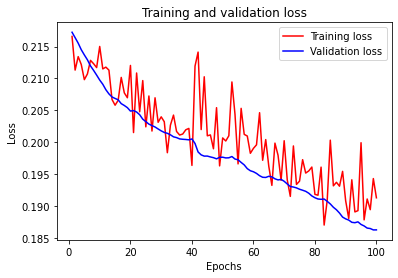

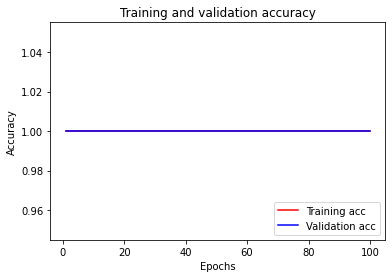

In [248]:
plot_history(history)